<a href="https://colab.research.google.com/github/amaneth/Gender-based-violence-classification/blob/main/Gender_based_violence_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gender Based Violence - Tweet classification challenge 

This challenge aims to classify tweets about GBV without using keywords.

Are you able to develop a machine learning model that can classify a tweet about gender-based violence into either of the five categories:
- Sexual violence
- Emotional violence
- Economic violence
- Physical violence
- Harmful traditional practice


### Install modules/package

In [1]:
!pip install pyyaml==5.4.1
!pip install -U nltk #natural language toolkit
!pip install texthero
!pip install tweet-preprocessor
!pip install transformers
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 29.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 47.8 MB/s 
     |████████████████████████████████| 10.4 MB 22.9 MB/s 
     |████████████████████████████████| 1.0 MB 59.5 MB/s 
     |████████████████████████████████| 184 kB 52.8 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8

In [2]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 26.8 MB/s 
     |████████████████████████████████| 821 kB 59.6 MB/s 
     |████████████████████████████████| 458 kB 58.5 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavio

In [3]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### import libraries/modules

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical

### load the dataset

In [16]:
train = pd.read_csv("/content/sample_data/Train.csv")
test2 = pd.read_csv("/content/sample_data/Test.csv")
val_test=pd.read_csv("/content/sample_data/bert_mine.csv")

In [17]:
test2['type']= val_test['type']
train.columns,test2.columns

(Index(['Tweet_ID', 'tweet', 'type'], dtype='object'),
 Index(['Tweet_ID', 'tweet', 'type'], dtype='object'))

In [18]:
test2.drop(test2[test2['type']=='sexual_violence'].index, inplace = True) #drop sexual_violence
train_final=pd.concat([train,test2],axis=0)

In [19]:
train_final['type'].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

In [20]:
labels_ord = ['Harmful_Traditional_practice','Physical_violence', 'economic_violence', 'emotional_violence','sexual_violence']
train_final['type'] = train_final.type.astype('category').cat.codes


In [21]:
Y = to_categorical(train_final['type'], dtype='uint8')

for i in range(len(labels_ord)) :     
     train_final[labels_ord[i]] = Y[:,i]

In [22]:
train_final.head()

,Tweet_ID,tweet,type,Harmful_Traditional_practice,Physical_violence,economic_violence,emotional_violence,sexual_violence
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,4,0,0,0,0,1
1,ID_00395QYM,he thought the word raped means sex and told m...,4,0,0,0,0,1
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,4,0,0,0,0,1
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,4,0,0,0,0,1
4,ID_004F7516,Chessy Prout can do better by telling the trut...,4,0,0,0,0,1


In [23]:
X = train_final.drop(['type'], axis=1)
y = train_final['type']

In [24]:
train_df = train_final.drop(['type'], axis=1)
test_df = pd.read_csv("/content/sample_data/Test.csv")
print(train_df.columns,train_df.shape)
target_col= train_df.columns[2:]
feature_col= train_df.columns[1:2]
train_df.head()

Index(['Tweet_ID', 'tweet', 'Harmful_Traditional_practice',
       'Physical_violence', 'economic_violence', 'emotional_violence',
       'sexual_violence'],
      dtype='object') (47175, 7)


,Tweet_ID,tweet,Harmful_Traditional_practice,Physical_violence,economic_violence,emotional_violence,sexual_violence
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,0,0,0,0,1
1,ID_00395QYM,he thought the word raped means sex and told m...,0,0,0,0,1
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,0,0,0,0,1
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,0,0,0,0,1
4,ID_004F7516,Chessy Prout can do better by telling the trut...,0,0,0,0,1


In [25]:
target_col , feature_col

(Index(['Harmful_Traditional_practice', 'Physical_violence',
        'economic_violence', 'emotional_violence', 'sexual_violence'],
       dtype='object'), Index(['tweet'], dtype='object'))

In [26]:
test_df.head()

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."


##Data Preprocessing

In [27]:
import re 
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word
from nltk.corpus import words
nltk.download('words')
import texthero as hero
import re
from texthero import stopwords

from nltk.corpus import wordnet

import tensorflow as tf

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import tensorflow as tf


def lemma_per_pos(sent):
    '''function to lemmatize according to part of speech tag'''
    tweet_tokenizer=TweetTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [lemmatizer.lemmatize(w) for w in  tweet_tokenizer.tokenize(sent)]
    return " ".join(lemmatized_list)

def df_preprocessing(df,feature_col):
    '''
    Preprocessing of dataframe
    '''
    stop = set(stopwords.words('english'))
    df[feature_col]= (df[feature_col].pipe(hero.lowercase).
                      pipe(hero.remove_urls).
                      pipe(hero.remove_digits).
                      pipe(hero.remove_punctuation).
                      pipe(hero.remove_html_tags) )
    # lemmatization
#     df[feature_col]= [lemma_per_pos(sent) for sent in df[feature_col]]
    # df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [29]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [30]:
with tf.device('/device:GPU:0'):
    proc_train_df= df_preprocessing(train_df,feature_col[0])

In [31]:
proc_test_df = df_preprocessing(test_df,feature_col[0])

##Length Statistics

Max length: 70, Min length: 3, Average Length :38


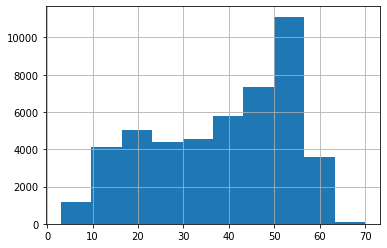

In [32]:
proc_train_df['len']= proc_train_df[feature_col[0]].str.split().map(lambda x : len(x))

print('Max length: {}, Min length: {}, Average Length :{}'.format(max(proc_train_df['len']),min(proc_train_df['len']),int(proc_train_df['len'].mean())))
proc_train_df.len.hist()
plt.show()

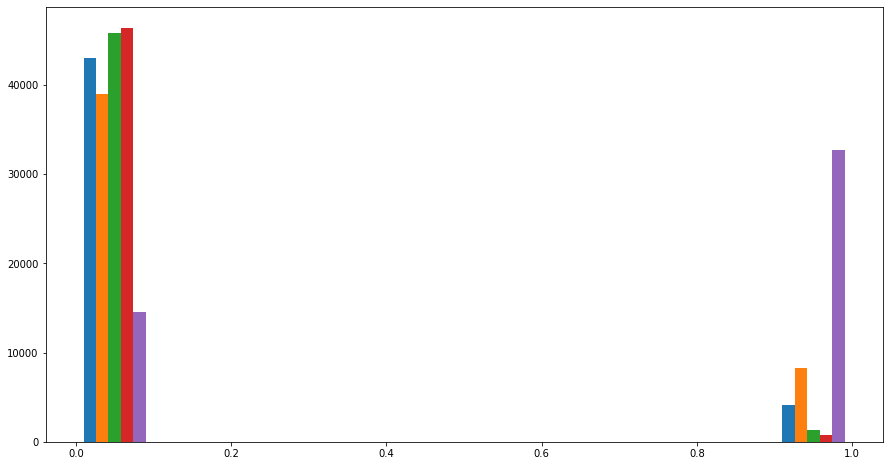

In [33]:
plt.figure(figsize=(15,8))
plt.hist(x=[proc_train_df.Harmful_Traditional_practice ,proc_train_df.Physical_violence,proc_train_df.emotional_violence,proc_train_df.economic_violence,proc_train_df.sexual_violence])
plt.show()

##BERT model declaration

In [34]:
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import AdamW, get_linear_schedule_with_warmup
import tensorflow_addons as tfa


#Creating tokenizer
def create_tokenizer(pretrained_weights='distilbert-base-uncased'):
  '''Function to create the tokenizer'''

  tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)
  return tokenizer

#Tokenization of the data
def data_tokenization(dataset,feature_col,max_len,tokenizer):
    '''dataset: Pandas dataframe with feature name is column name 
    Pretrained_weights: selected model 
    RETURN: [input_ids, attention_mask]'''

    tokens = dataset[feature_col].apply(lambda x: tokenizer(x,return_tensors='tf', 
                                                            truncation=True,
                                                            padding='max_length',
                                                            max_length=max_len, 
                                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)


    return [input_ids,attention_mask]

def bert_model(pretrained_weights,max_len,learning_rate):
  '''BERT model creation with pretrained weights
  INPUT:
  pretrained_weights: Language model pretrained weights
  max_len: input length '''
  print('Model selected:', pretrained_weights)
  bert=TFAutoModel.from_pretrained(pretrained_weights)
  
  # This is must if you would like to train the layers of language models too.
  for layer in bert.layers:
      layer.trainable = True

  # parameter declaration
#   step = tf.Variable(0, trainable=False)
#   schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [2e-0, 2e-1, 1e-2])
#   # lr and wd can be a function or a tensor
#   lr = learning_rate * schedule(step)
#   wd = lambda:lr * schedule(step)
#   optimizer = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

  optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
#   optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

  # declaring inputs, BERT take input_ids and attention_mask as input
  input_ids= Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
  attention_mask=Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

  bert= bert(input_ids,attention_mask=attention_mask)
  x= bert[0][:,0,:]
  x=tf.keras.layers.Dropout(0.1)(x)
  x= tf.keras.layers.Dense(128)(x)
  x=tf.keras.layers.Dense(64)(x)
  x=tf.keras.layers.Dense(32)(x)

  output=tf.keras.layers.Dense(5,activation='sigmoid')(x)

  model=Model(inputs=[input_ids,attention_mask],outputs=[output])
  # compiling model 
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE,name='binary_crossentropy'),
                metrics=['accuracy'])
  return model

In [35]:
pretrained_weights='bert-base-uncased'
max_len=256
epochs=3
learning_rate=2e-5
batch_size=4

In [36]:
tokenizer= create_tokenizer(pretrained_weights)

In [37]:
x_train= data_tokenization(proc_train_df,feature_col[0],max_len,tokenizer)

In [38]:
y_train= proc_train_df[target_col].values
y_train

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [39]:
bert=bert_model(pretrained_weights,max_len,learning_rate)
bert.summary()

Model selected: bert-base-uncased


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [ ]:
with tf.device('/device:GPU:0'):
    bert.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/3
11794/11794 [==============================] - 2870s 243ms/step - loss: 0.0094 - accuracy: 0.9941
Epoch 2/3
11794/11794 [==============================] - 2871s 243ms/step - loss: 0.0050 - accuracy: 0.9971
Epoch 3/3
  301/11794 [..............................] - ETA: 46:18 - loss: 0.0033 - accuracy: 0.9983

In [ ]:
proc_test_df.columns

Index(['Tweet_ID', 'tweet'], dtype='object')

In [ ]:
test_ids= proc_test_df['Tweet_ID']
x_test= data_tokenization(proc_test_df,feature_col[0],max_len,tokenizer)
x_test

[array([[  101,  2138,  2002, ...,     0,     0,     0],
        [  101,  8840,  2140, ...,     0,     0,     0],
        [  101, 14717,  1055, ...,     0,     0,     0],
        ...,
        [  101,  2931,  3076, ...,     0,     0,     0],
        [  101,  8945, 27052, ...,     0,     0,     0],
        [  101, 12633,  2196, ...,     0,     0,     0]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)]

In [ ]:
preds= bert.predict(x_test)

In [ ]:
proc_test_df.shape

(15581, 2)

In [ ]:
pred_result = np.argmax(preds, axis=1)

In [ ]:
pred_result

array([3, 0, 0, ..., 4, 4, 0])

In [ ]:
labels = np.array(labels_ord)

In [ ]:
pred = labels[pred_result]

### submission

In [ ]:
sample_submission = pd.read_csv("/content/SampleSubmission.csv")

In [ ]:
sample_submission.head()

,Tweet_ID,type
0,ID_0095QL4S,NaN
1,ID_00DREW5O,NaN
2,ID_00E9F5X9,NaN
3,ID_00G9OSKZ,NaN
4,ID_00HU96U6,NaN


In [ ]:
sample_submission["type"] = pred

In [ ]:
sample_submission.to_csv('bert_mine.csv', index=False)